Heart Stroke Prediction
========================
This project aims to predict the likelihood of a heart stroke using various machine learning models. The dataset used for this project is sourced from Kaggle and contains various health-related features.


In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import janitor
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('../00_raw_data/heart-stroke-dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data Preprocessing
===================


In [4]:
# Clean column names for standardization0
df = df.clean_names()
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [5]:
# descriptive statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Check the structure of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Convert age to the appropiate data type 
df['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [8]:
 # Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# Replace missing values with the most frequent value
df['bmi'] = df['bmi'].fillna(df['bmi'].mode()[0])

In [10]:
# Check values and counts
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['residence_type'].value_counts())
print(df['smoking_status'].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [38]:
# Replacing the values in columns with numerical values 
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0}).astype(int)
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other': 2}).astype(int)
df['residence_type'] = df['residence_type'].replace({'Urban': 1, 'Rural': 0}).astype(int)
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 1, 'formerly smoked': 0, 'smokes': 2, 'Unknown': 3}).astype(int)
df['work_type'] = df['work_type'].replace({'Self-employed': 1, 'Private': 0, 'children': 2, 'Govt_job': 3, 'Never_worked': 4}).astype(int)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,1,1,0,202.21,28.7,1,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,1,1


Exploratory Data Analysis (EDA)
=========================

Bar plot - Count of Gender

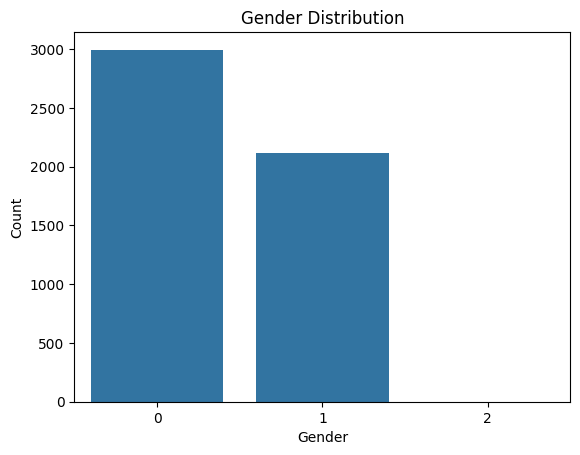

In [12]:
sns.countplot(x='gender', data = df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='residence_type', ylabel='count'>

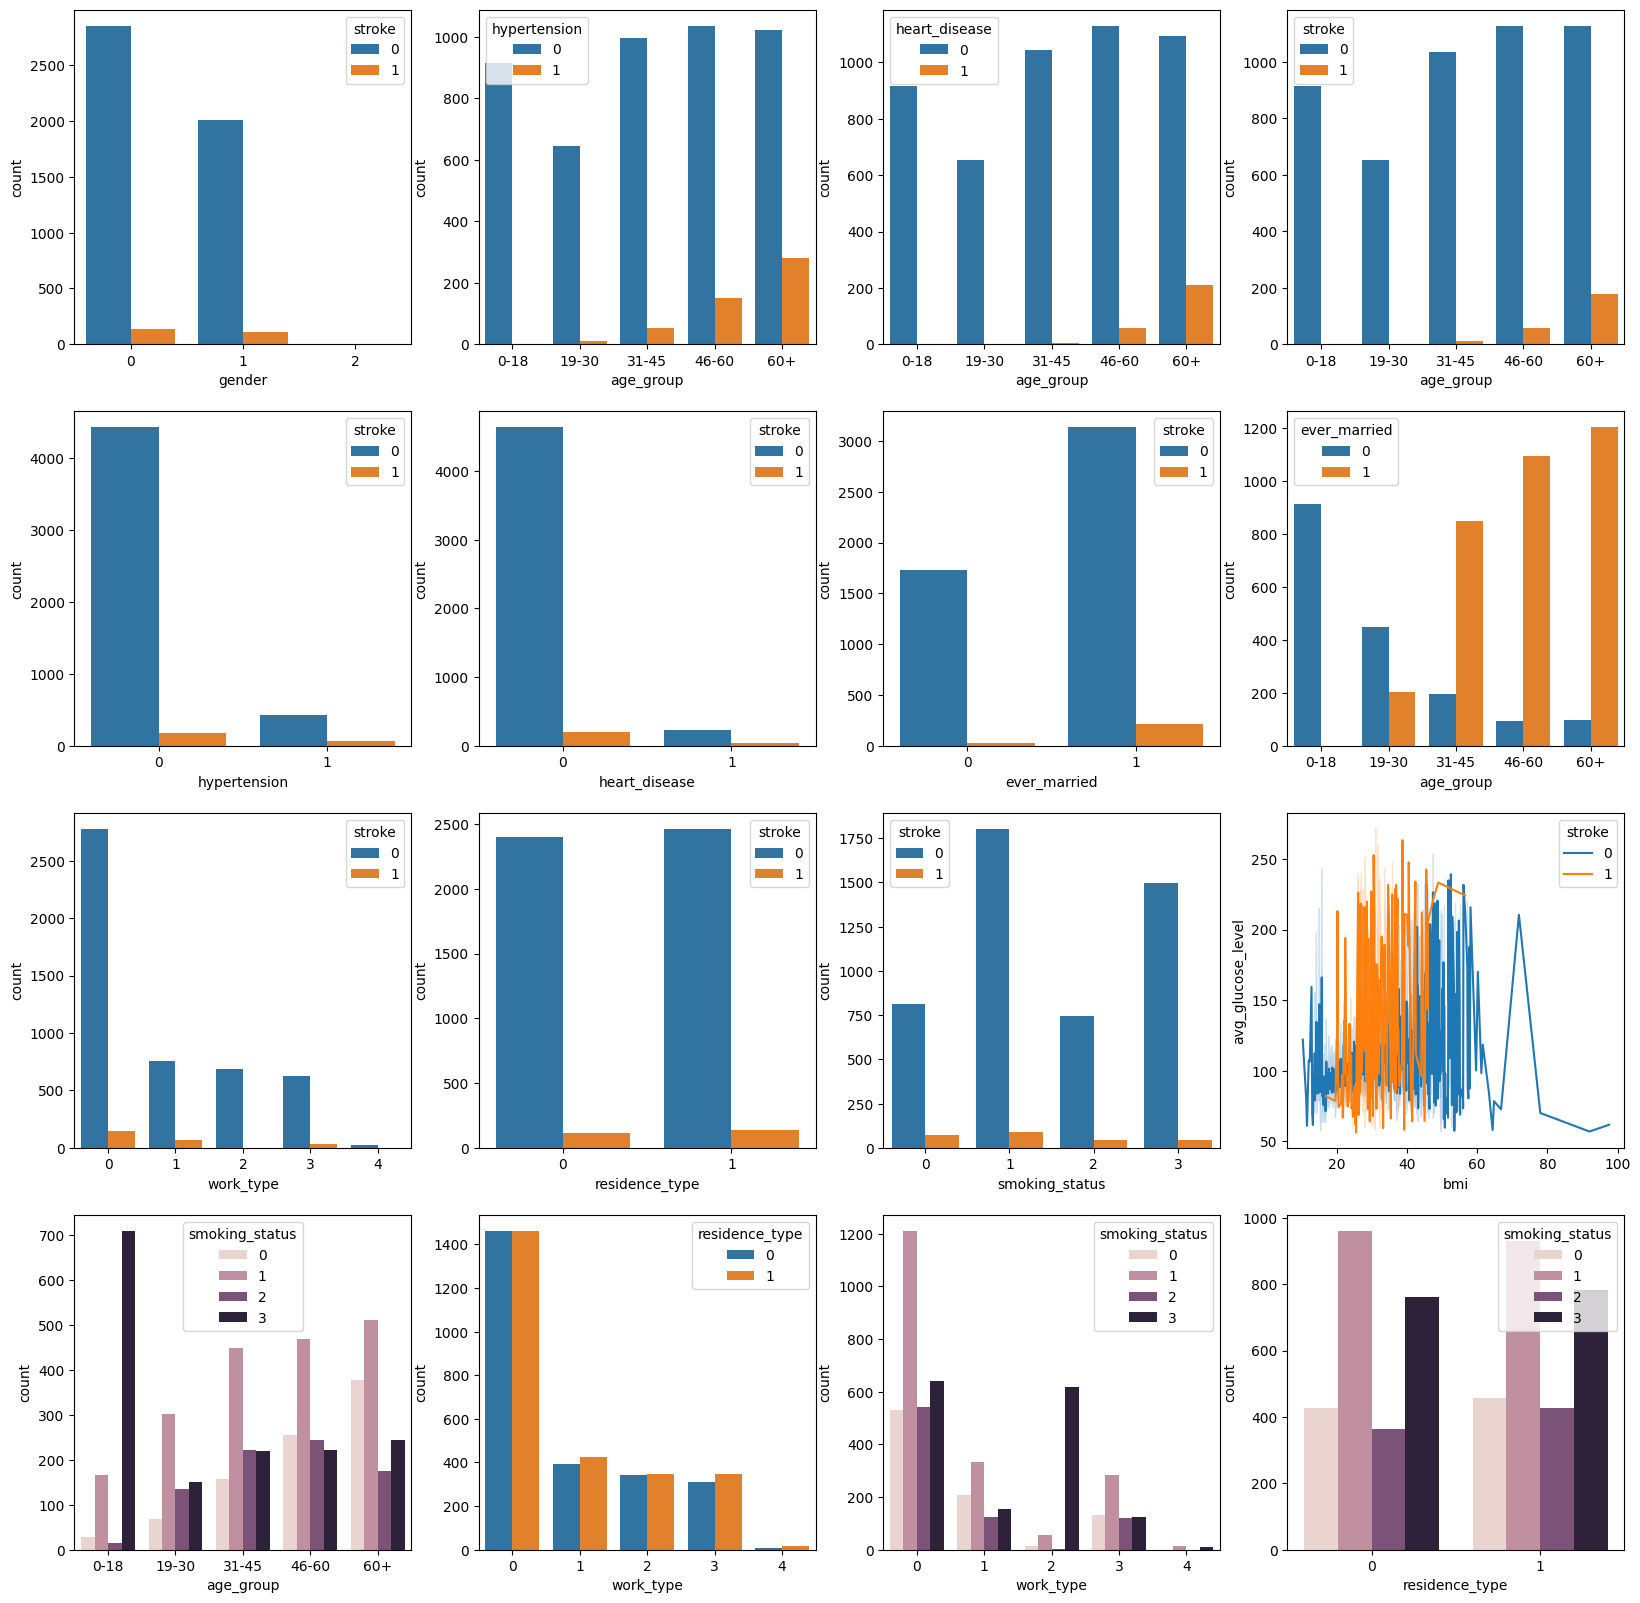

In [13]:
# Age is a continous variable which would lead to too many bars or messy or unreadable plots

# Create binned age column
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], 
                         labels=['0-18', '19-30', '31-45', '46-60', '60+'])

fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age_group', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age_group', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age_group', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age_group', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age_group', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

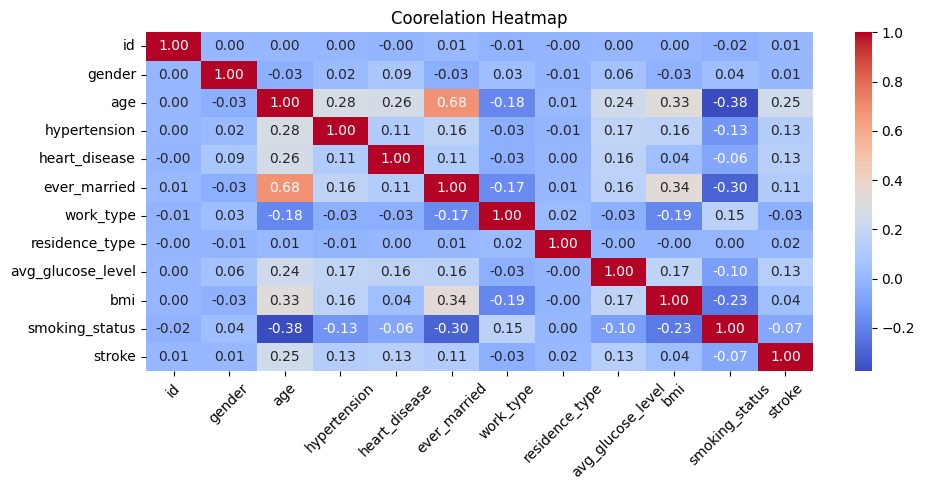

In [14]:
# Coorelation heatmap 

# keep only numeric columns 
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap 
plt.figure(figsize = (10,5))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Coorelation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Predictive Modeling
=====================


In [15]:
#  Import  libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import metrics

Train and Test Split

In [16]:
# Drop age group
df.drop(columns=['age_group'], inplace = True)

x_train, x_test, y_train, y_test = train_test_split(df.drop('stroke', axis = 1), df['stroke'], test_size=0.2, random_state=42)

Model Training


Logistic Regression

In [17]:
#lr = LogisticRegression(max_iter=1000)
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [18]:
# Training the model 
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9393346379647749

In [19]:
# Testing the model
lr_pred = lr.predict(x_test)
accuracy_score(y_test, lr_pred)

0.9393346379647749

Support Vector Machine (SVM)

In [20]:
svm = SVC()
svm

SVC()

In [21]:
# Training the model 
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9393346379647749

In [22]:
# Testing the model 
sv_pred = svm.predict(x_test)
accuracy_score(y_test, sv_pred)

0.9393346379647749

Decision Tree Classifier

In [23]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [24]:
# Training the model
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.9060665362035225

In [25]:
# testing the model 
dt_pred = dt.predict(x_test)
accuracy_score(y_test, dt_pred)

0.9060665362035225

K-Nearest Neighbors (KNN)   

In [26]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [27]:
# Training the model 
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9393346379647749

In [28]:
knn_pred = knn.predict(x_test)
accuracy_score(y_test, knn_pred)

0.9393346379647749

Graphical Representation of Model Performance


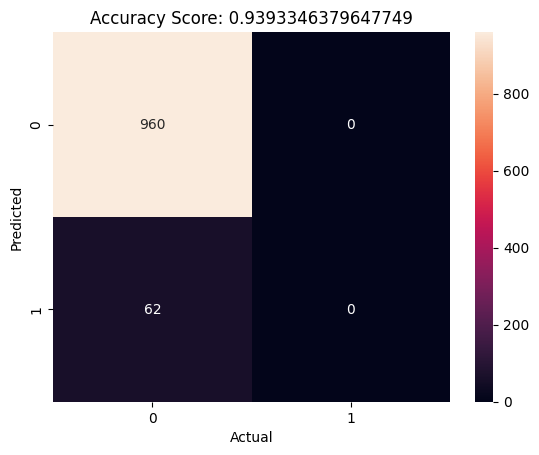

In [29]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test,lr_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [30]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score:',metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error:',metrics.mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model log loss:', log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9393346379647749
Logistic Regression Model F1 score: 0.0
Logistic Regression Model Mean Absolute Error: 0.060665362035225046
Logistic Regression Model Mean Squared Error: 0.060665362035225046
Logistic Regression Model log loss: 2.1866012819229588


Support Vector Machine (SVM)

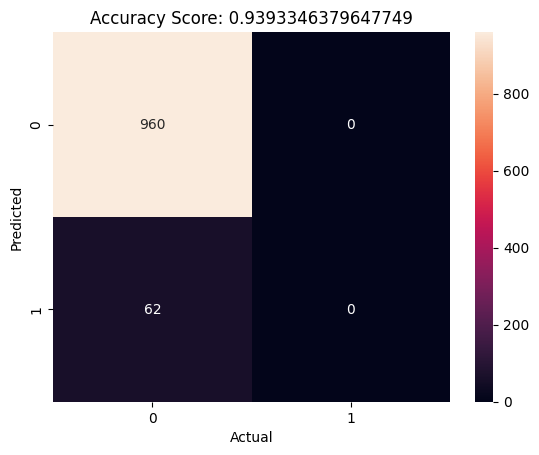

In [31]:
sns.heatmap(metrics.confusion_matrix(y_test, sv_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, sv_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()



In [32]:
print('SVM Model Accuracy Score:',accuracy_score(y_test, sv_pred))
print('SVM Model F1 score: ',metrics.f1_score(y_test, sv_pred))
print('SVM Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, sv_pred))
print('SVM Model Mean Squared Error: ',metrics.mean_squared_error(y_test, sv_pred))
print('SVM Model log loss: ',log_loss(y_test, sv_pred))

SVM Model Accuracy Score: 0.9393346379647749
SVM Model F1 score:  0.0
SVM Model Mean Absolute Error:  0.060665362035225046
SVM Model Mean Squared Error:  0.060665362035225046
SVM Model log loss:  2.1866012819229588


Decision Tree Classifier

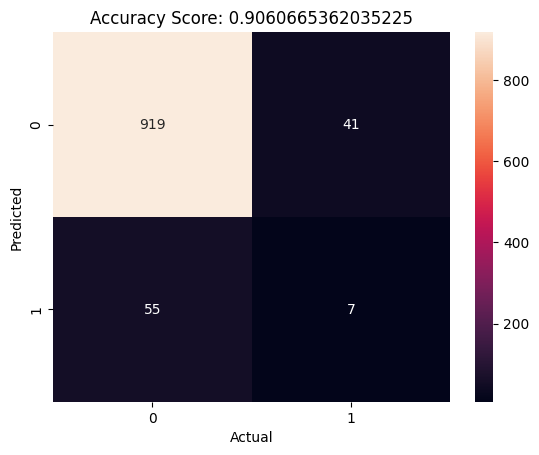

In [33]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, dt_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [34]:
print('Decision Tree Model Accuracy Score:',accuracy_score(y_test, dt_pred))
print('Decision Tree Model F1 score: ',metrics.f1_score(y_test, dt_pred))
print('Decision Tree Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error: ',metrics.mean_squared_error(y_test, dt_pred))
print('Decision Tree Model log loss: ',log_loss(y_test, dt_pred))

Decision Tree Model Accuracy Score: 0.9060665362035225
Decision Tree Model F1 score:  0.12727272727272726
Decision Tree Model Mean Absolute Error:  0.09393346379647749
Decision Tree Model Mean Squared Error:  0.09393346379647749
Decision Tree Model log loss:  3.3857052107194194


K-Nearest Neighbors (KNN)

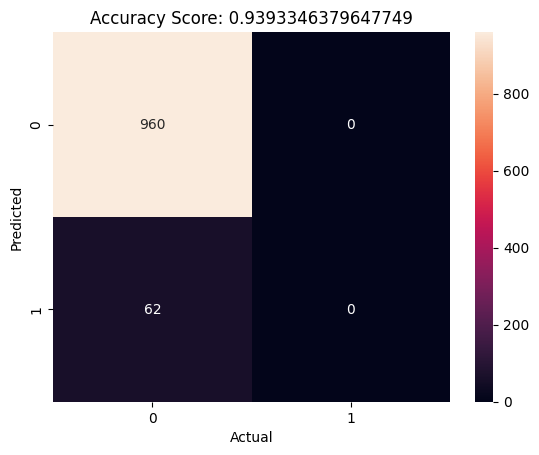

In [35]:
sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, knn_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

Model Comparison

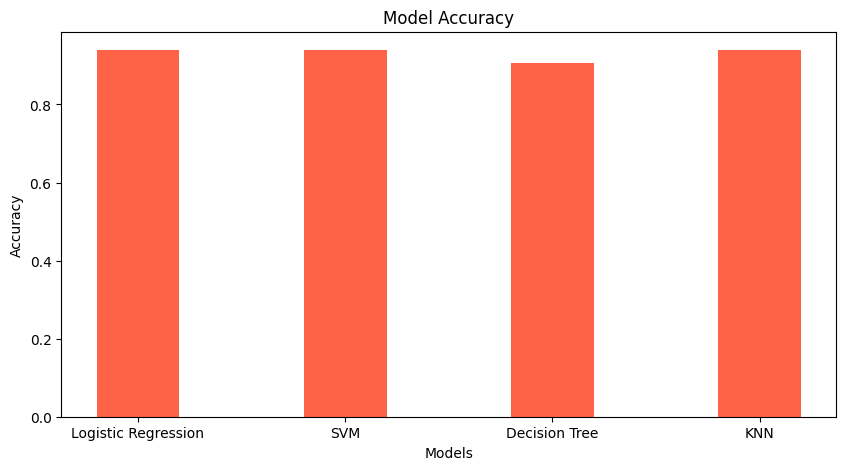

In [36]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy= [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color = 'tomato', width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [37]:
# Export csv file 
df.to_csv('../02_clean_data/cleaned_data.csv', index =False)